## [Face detection using <font color='red'>O</font>pen<font color='green'>C</font><font color='blue'>V</font> and Python](https://www.superdatascience.com/blogs/opencv-face-detection/)

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline

In [25]:
def convertToRGB(img):
    '''When you load an image using OpenCV, it loads it into BGR color space by default. 
    To show the colored image using matplotlib we have to convert it to RGB space.'''
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

### HAAR Cascade Classifier

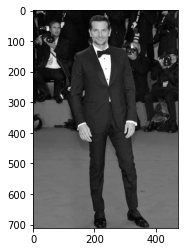

In [19]:
test1 = cv2.imread('ai_shop/fake_users/Bradley_Cooper5.jpeg')
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

In [5]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('opencv_data/haarcascade_frontalface_alt.xml')

In [8]:
#let's detect multiscale (some images may be closer to camera than others) images
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

#print the number of faces found
print('Faces found: ', len(faces))

Faces found:  2


In [9]:
faces

array([[ 58,  43,  38,  38],
       [183,  39,  72,  72]], dtype=int32)

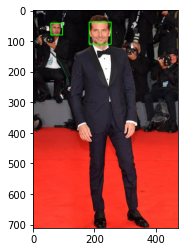

In [10]:
#go over list of faces and draw them as rectangles on original colored img 
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
#convert image to RGB and show image
plt.imshow(convertToRGB(test1))

#### Grouping OpenCV code into a function

In [23]:
def detect_faces(f_cascade, colored_img, scaleFactor=1.1):
    '''Detect faces in a picture by HAAR Cascade Classifier.
    
    * Parameters:
      f_cascade: CascadeClassifier
      colored_img: subject image
      scaleFactor: scaleFactor of CascadeClassifier.detectMultiScale function
      
    * Return: an image with detected faces highlight by green square frame
    '''
    #just making a copy of image passed, so that passed image is not changed
    img_copy = colored_img.copy()
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)       
    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);   
    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return img_copy

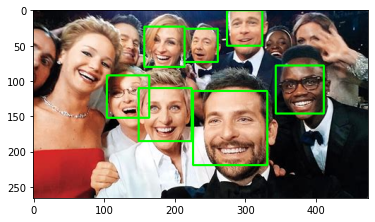

In [12]:
#load another image
test2 = cv2.imread('Oscar_Selfie_2014.jpeg')
#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)
#convert image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

#### Dealing with false positives

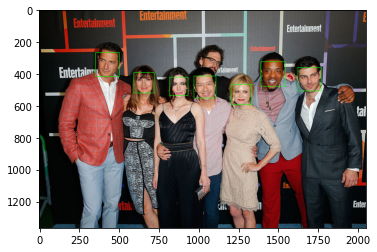

In [6]:
test2 = cv2.imread('Face-Detection-OpenCV/data/test4.jpg')
faces_detected_img = detect_faces(haar_face_cascade, test2)
plt.imshow(convertToRGB(faces_detected_img))

(Here we don't hit the false positive, but in the original article, yes.)

Picture in original article:

<img src="https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/5_blog_image_16.png" alt="False Positive" width="400" height="266.6">

A simple tweak to the scale factor compensates for this so can move that parameter around. For example, scaleFactor=1.2 improved the results.  

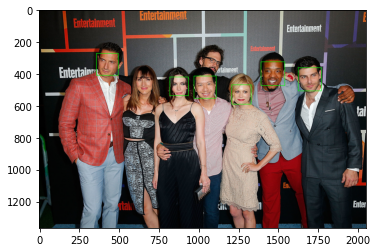

In [8]:
test2 = cv2.imread('Face-Detection-OpenCV/data/test4.jpg')
faces_detected_img = detect_faces(haar_face_cascade, test2, scaleFactor=1.2)
plt.imshow(convertToRGB(faces_detected_img))

### LBP cascade classifier

Thanks to GREAT OpenCV, the only thing change is the trainning file!

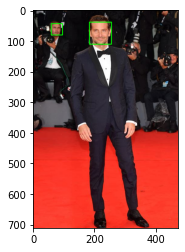

In [11]:
#load cascade classifier training file for lbpcascade 
lbp_face_cascade = cv2.CascadeClassifier('opencv_data/lbpcascade_frontalface.xml')  

#load test image
test2 = cv2.imread('ai_shop/fake_users/Bradley_Cooper5.jpeg')
#call our function to detect faces
faces_detected_img = detect_faces(lbp_face_cascade, test2)
#convert image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

## [Crop Image by OpenCV](https://learnopencv.com/cropping-an-image-using-opencv/)

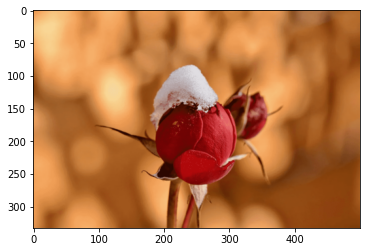

In [3]:
timg = cv2.imread('test.png')
plt.imshow(convertToRGB(timg))

In [35]:
timg.shape

(333, 500, 3)

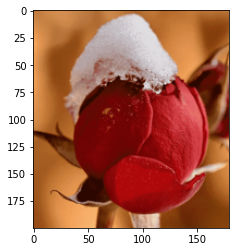

In [6]:
cropped_image = timg[80:280, 150:330] # Slicing to crop the image

plt.imshow(convertToRGB(cropped_image))

## My Trun!

### Crop the detected faces.

(711, 474, 3)

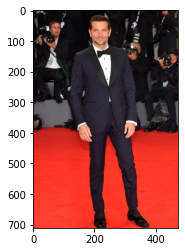

In [27]:
img0 = cv2.imread('ai_shop/fake_users/Bradley_Cooper5.jpeg')
plt.imshow(convertToRGB(img0))
img0.shape

In [21]:
lbp_face_cascade = cv2.CascadeClassifier('opencv_data/lbpcascade_frontalface.xml')  
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
faces = lbp_face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

faces
# [x, y, delta_x, delta_y] where x is VERTICAL axis, y is HORIZONTAL axis

array([[ 59,  44,  37,  37],
       [184,  39,  72,  72]], dtype=int32)

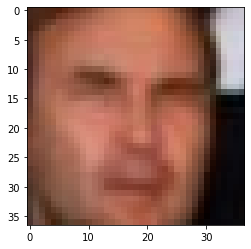

In [25]:
face1 = img0[44:44+37, 59:59+37]

plt.imshow(convertToRGB(face1))

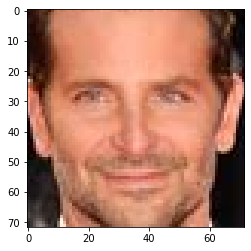

In [26]:
face2 = img0[39:39+72, 184:184+72]

plt.imshow(convertToRGB(face2))

### [Convert cropped image to bytes](https://stackoverflow.com/questions/52865771/write-opencv-image-in-memory-to-bytesio-or-tempfile)


In [38]:
import io

In [47]:
is_success, buffer = cv2.imencode(".png", face2)
io_buf = io.BytesIO(buffer)

### Finally, send to AWS Rekognition Face Analysis

In [31]:
import boto3

In [48]:
client = boto3.client('rekognition')

In [65]:
response = client.detect_faces(Image={'Bytes': io_buf.getvalue()}, Attributes=['ALL'])

In [51]:
response['FaceDetails'][0]

{'BoundingBox': {'Width': 0.6916636824607849,
  'Height': 0.9626032710075378,
  'Left': 0.27484622597694397,
  'Top': -0.029257383197546005},
 'AgeRange': {'Low': 30, 'High': 46},
 'Smile': {'Value': True, 'Confidence': 93.24374389648438},
 'Eyeglasses': {'Value': False, 'Confidence': 95.52523040771484},
 'Sunglasses': {'Value': False, 'Confidence': 97.26375579833984},
 'Gender': {'Value': 'Male', 'Confidence': 96.30160522460938},
 'Beard': {'Value': True, 'Confidence': 67.05868530273438},
 'Mustache': {'Value': False, 'Confidence': 94.08015441894531},
 'EyesOpen': {'Value': True, 'Confidence': 98.97506713867188},
 'MouthOpen': {'Value': False, 'Confidence': 93.26386260986328},
 'Emotions': [{'Type': 'HAPPY', 'Confidence': 97.96737670898438},
  {'Type': 'CALM', 'Confidence': 0.7392194867134094},
  {'Type': 'SURPRISED', 'Confidence': 0.4288181662559509},
  {'Type': 'DISGUSTED', 'Confidence': 0.3499622941017151},
  {'Type': 'SAD', 'Confidence': 0.1952546238899231},
  {'Type': 'FEAR', 'Co

#### Extract features

In [66]:
response_less = response['FaceDetails'][0].copy()

del response_less['Confidence']
del response_less['Quality']
del response_less['Pose']
del response_less['Landmarks']
del response_less['BoundingBox']

response_less

{'AgeRange': {'Low': 30, 'High': 46},
 'Smile': {'Value': True, 'Confidence': 93.24374389648438},
 'Eyeglasses': {'Value': False, 'Confidence': 95.52523040771484},
 'Sunglasses': {'Value': False, 'Confidence': 97.26375579833984},
 'Gender': {'Value': 'Male', 'Confidence': 96.30160522460938},
 'Beard': {'Value': True, 'Confidence': 67.05868530273438},
 'Mustache': {'Value': False, 'Confidence': 94.08015441894531},
 'EyesOpen': {'Value': True, 'Confidence': 98.97506713867188},
 'MouthOpen': {'Value': False, 'Confidence': 93.26386260986328},
 'Emotions': [{'Type': 'HAPPY', 'Confidence': 97.96737670898438},
  {'Type': 'CALM', 'Confidence': 0.7392194867134094},
  {'Type': 'SURPRISED', 'Confidence': 0.4288181662559509},
  {'Type': 'DISGUSTED', 'Confidence': 0.3499622941017151},
  {'Type': 'SAD', 'Confidence': 0.1952546238899231},
  {'Type': 'FEAR', 'Confidence': 0.13599690794944763},
  {'Type': 'CONFUSED', 'Confidence': 0.10895577818155289},
  {'Type': 'ANGRY', 'Confidence': 0.07442019134759

In [68]:
def extract(response, confidence_threshold=80):
    features = {}
    features['AgeRange'] = (response['AgeRange']['Low'], response['AgeRange']['High'])
    features['Gender'] = response['Gender']['Value']
    
    features['Emotions'] = []
    for emotion in response['Emotions']:
        if emotion['Confidence'] >= confidence_threshold:
            features['Emotions'].append(emotion['Type'])
            
    del response['Emotions']
    del response['MouthOpen']
    del response['EyesOpen']
    del response['AgeRange']
    del response['Confidence']
    del response['Quality']
    del response['Pose']
    del response['Landmarks']
    del response['BoundingBox']
    del response['Gender']
    
    features['others'] = []
    for key in face_details.keys():
        if (response[key]['Confidence'] >= confidence_threshold
            and response[key]['Value']):
            features['others'].append(key)
    
    return features

face_details = response['FaceDetails'][0]
features = extract(face_details)

features

{'AgeRange': (30, 46),
 'Gender': 'Male',
 'Emotions': ['HAPPY'],
 'others': ['Smile']}

## ALL Togather

In [2]:
import cv2
import io
import boto3


def extract(response, confidence_threshold=80) -> list:
    '''Extract the infomations we care from response of AWS rekognition face detection.

    * Parameters:
      response: the response from AWS
      confidence_threshold: tags will be pick up only when their Confidence is higher than
                            this number

    * Return:
      A list of features.
      1st element is a tuple, tells (min, max) of posible age.
      2nd element is gender, a str
      3rd element is emotions, a list of str
      The rest are str of features

      e.g. [(30, 46), 'Male', ['HAPPY'], 'Smile', 'Beard']
    '''
    features = []
    features.append((response['AgeRange']['Low'], response['AgeRange']['High']))
    features.append(response['Gender']['Value'])
    
    features.append([])
    for emotion in response['Emotions']:
        if emotion['Confidence'] >= confidence_threshold:
            features[2].append(emotion['Type'])
            
    del response['Emotions']
    del response['MouthOpen']
    del response['EyesOpen']
    del response['AgeRange']
    del response['Confidence']
    del response['Quality']
    del response['Pose']
    del response['Landmarks']
    del response['BoundingBox']
    del response['Gender']

    for key in response.keys():
        if (response[key]['Confidence'] >= confidence_threshold
            and response[key]['Value']):
            features.append(key)
    
    return features

client = boto3.client('rekognition')
lbp_face_cascade = cv2.CascadeClassifier('opencv_data/lbpcascade_frontalface.xml')  

customer = cv2.imread('ai_shop/fake_users/Bradley_Cooper5.jpeg')
gray_img = cv2.cvtColor(customer, cv2.COLOR_BGR2GRAY)
faces = lbp_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

analysis = []
if len(faces):
    for x, y, delta_x, delta_y in faces:
        is_success, buffer = cv2.imencode(".png", customer[y:y+delta_y, x:x+delta_x])
        io_buf = io.BytesIO(buffer)
        analysis.append(
            extract(
                client.detect_faces(
                    Image={'Bytes': io_buf.getvalue()}, 
                    Attributes=['ALL']
                )['FaceDetails'][0]
            )
        )
        
analysis

[[(47, 65), 'Female', ['ANGRY']], [(30, 46), 'Male', ['HAPPY'], 'Smile']]

## [Read Bytes Image](https://stackoverflow.com/questions/17170752/python-opencv-load-image-from-byte-string)

In [39]:
with open('ai_shop/fake_users/Bradley_Cooper5.jpeg', 'rb') as i:
    img = i.read()

type(img)

bytes

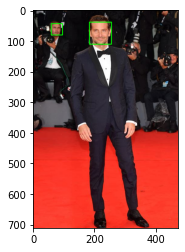

In [40]:
imgarr = np.frombuffer(img, np.uint8)
img_np = cv2.imdecode(imgarr, cv2.COLOR_BGR2GRAY)
lbp_face_cascade = cv2.CascadeClassifier('opencv_data/lbpcascade_frontalface.xml')  
faces_detected_img = detect_faces(lbp_face_cascade, img_np)

plt.imshow(convertToRGB(faces_detected_img))
#plt.imshow(img_np)

In [41]:
imgarr = np.frombuffer(img, np.uint8)
img_np = cv2.imdecode(imgarr, cv2.COLOR_BGR2GRAY)
faces = lbp_face_cascade.detectMultiScale(img_np, scaleFactor=1.1, minNeighbors=5)

faces

array([[ 59,  44,  37,  37],
       [184,  39,  72,  72]], dtype=int32)

In [48]:
def fine_tune(frame):
    x, y, dx, dy = frame
    if dx < 80:
        x -= int((80 - dx) / 2)
        dx = 80
    if dy < 80:
        y -= int((80 - dy) / 2)
        dy = 80
    return x, y, dx, dy

In [42]:
face1 = faces[0]
face2 = faces[1]

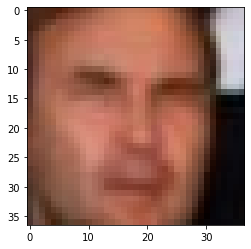

In [43]:
x, y, delta_x, delta_y = face1

plt.imshow(convertToRGB(img_np[y:y+delta_y, x:x+delta_x]))

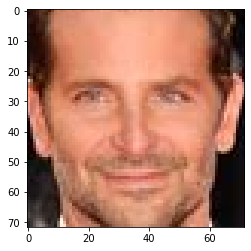

In [44]:
x, y, delta_x, delta_y = face2

plt.imshow(convertToRGB(img_np[y:y+delta_y, x:x+delta_x]))

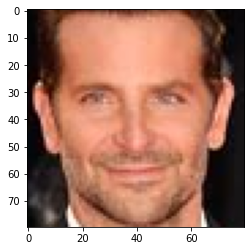

In [49]:
x, y, delta_x, delta_y = fine_tune(face2)

plt.imshow(convertToRGB(img_np[y:y+delta_y, x:x+delta_x]))

In [ ]:
cv2.imwrite('Bradley_Cooper-only_face.png', img_np[y:y+delta_y, x:x+delta_x])

In [50]:
x, y, delta_x, delta_y = fine_tune(face2)

cv2.imwrite('Bradley_Cooper-only_face-fine_tune.png', img_np[y:y+delta_y, x:x+delta_x])

True

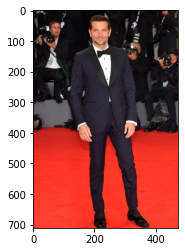

In [45]:
plt.imshow(convertToRGB(img_np))